# This file will use the saved simulation results to compare the data and visualize it within the figures.

In [8]:
import astropy.io.fits as fits
import astropy.units as u
import os
import numpy as np
import time
from pathlib import Path
home_path = Path(os.getcwd())

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})

from importlib import reload
import misc_functions
reload(misc_functions)
from misc_functions import mask_im, get_avg_masked
from misc_functions import setup_ipac_interpfun, setup_prop_interpfun, setup_prop_dm_interpfun

lambda0_m = 575e-9
D = 2.3631
mas_per_lamD = lambda0_m * 360.0 * 3600.0 / (2 * np.pi * D) * 1000    # mas per lambda0/D
as_per_lamD = mas_per_lamD/1000

nzodi = 256
nprop = 256
nipac = 128

ipac_pxscl_lamD = 0.2
prop_pxscl_lamD = 0.1

ipac_pxscl_mas = ipac_pxscl_lamD*mas_per_lamD # define the different pixelscale
prop_pxscl_mas = prop_pxscl_lamD*mas_per_lamD

sim_exmax = (nipac/2)*ipac_pxscl_lamD # define extent of simulation figures in lamD
sim_extent = [-sim_exmax,sim_exmax,-sim_exmax,sim_exmax]

## Define which results you would like to compare with the parameters and get the data from that file. Begin by comparing the linear and nearest interpolation results from the IPAC PSFs.

The average of the unmasked data is 0.1185 and the maximum is 0.6510.


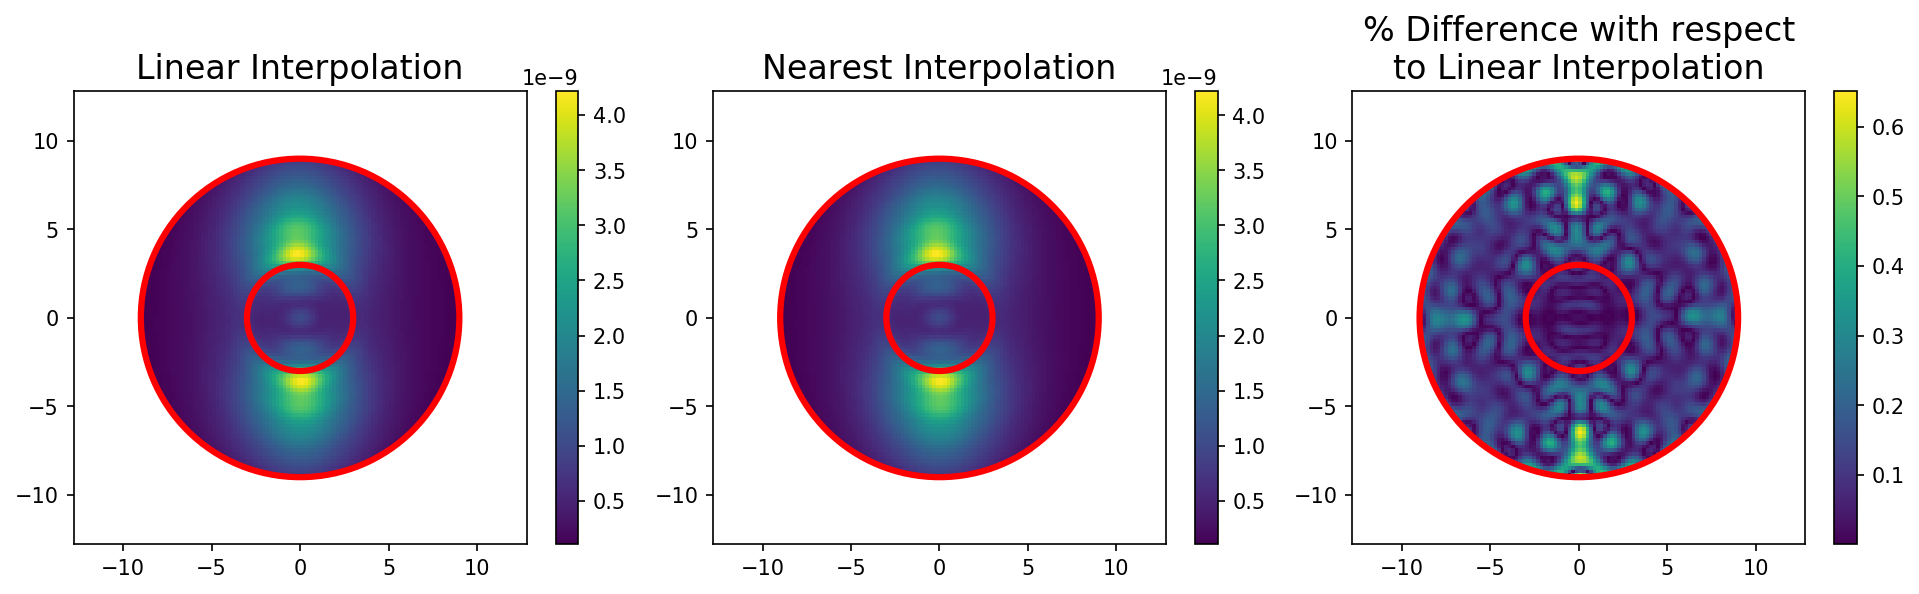

In [17]:
inc = 81.29
method1 = 'linear'
psftype1 = 'ipac'

sim1_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype1+'_'+method1+'.fits'
sim1 = fits.getdata(sim1_fname)
sim1 = mask_im(sim1,ipac_pxscl_mas,nipac)

method2 = 'nearest'
psftype2 = 'ipac'

sim2_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype2+'_'+method2+'.fits'
sim2 = fits.getdata(sim2_fname)
sim2 = mask_im(sim2,ipac_pxscl_mas,nipac)

diff = sim1-sim2 # get the difference between the simulation data
perdiff = np.abs(diff/sim1*100) # this is the percent difference array with respect to the 1st simulation data
get_avg_masked(perdiff) # this will display the average and maximum of the percent difference array

figwidth = 16
figheight = 4
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figwidth,figheight), dpi = 150 )
cbar_size = 1
fontsz = 16

im = ax[0].imshow(sim1, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[0], shrink=cbar_size) 

im = ax[1].imshow(sim2, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Nearest Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[1], shrink=cbar_size)

im = ax[2].imshow(perdiff, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[2].add_patch(circ_in)
ax[2].add_patch(circ_out)
ax[2].set_title('% Difference with respect\nto Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[2], shrink=cbar_size) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

## Then compare the linear and nearest interpolation results from the PROPER PSFs without DMs.

The average of the unmasked data is 0.0598 and the maximum is 0.2575.


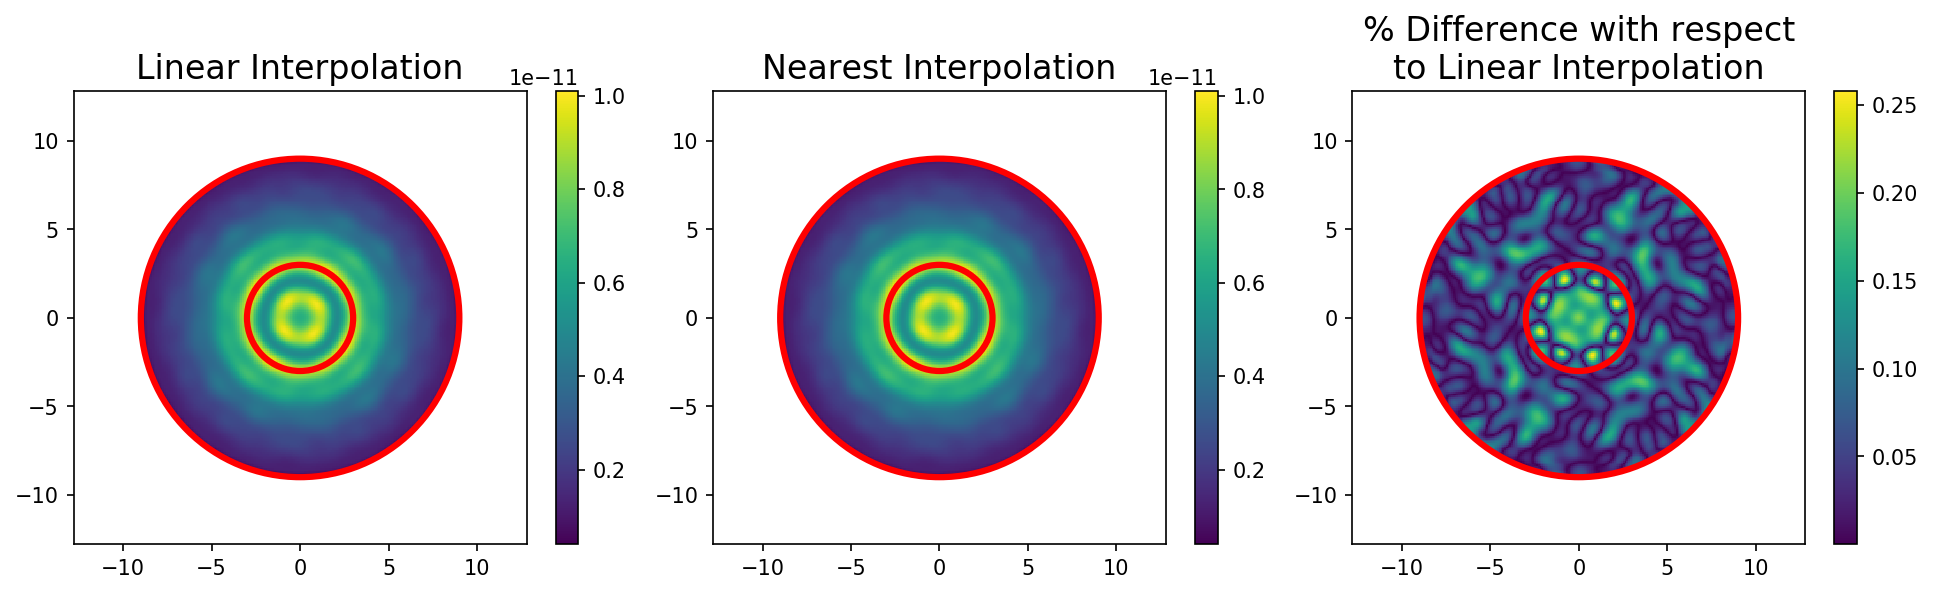

In [14]:
inc = 0
method1 = 'linear'
psftype1 = 'prop'

sim1_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype1+'_'+method1+'.fits'
sim1 = fits.getdata(sim1_fname)
sim1 = mask_im(sim1,prop_pxscl_mas,nprop)

method2 = 'nearest'
psftype2 = 'prop'

sim2_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype2+'_'+method2+'.fits'
sim2 = fits.getdata(sim2_fname)
sim2 = mask_im(sim2,prop_pxscl_mas,nprop)

diff = sim1-sim2 # get the difference between the simulation data
perdiff = np.abs(diff/sim1*100) # this is the percent difference array with respect to the 1st simulation data
get_avg_masked(perdiff) # this will display the average and maximum of the percent difference array

figwidth = 16
figheight = 4
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figwidth,figheight), dpi = 150 )
cbar_size = 1
fontsz = 16

im = ax[0].imshow(sim1, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[0], shrink=cbar_size) 

im = ax[1].imshow(sim2, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Nearest Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[1], shrink=cbar_size)

im = ax[2].imshow(perdiff, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[2].add_patch(circ_in)
ax[2].add_patch(circ_out)
ax[2].set_title('% Difference with respect\nto Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[2], shrink=cbar_size) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

## Finally, compare the linear and nearest interpolation results from the PROPER PSFs with DMs.

The average of the unmasked data is 0.0326 and the maximum is 0.3548.


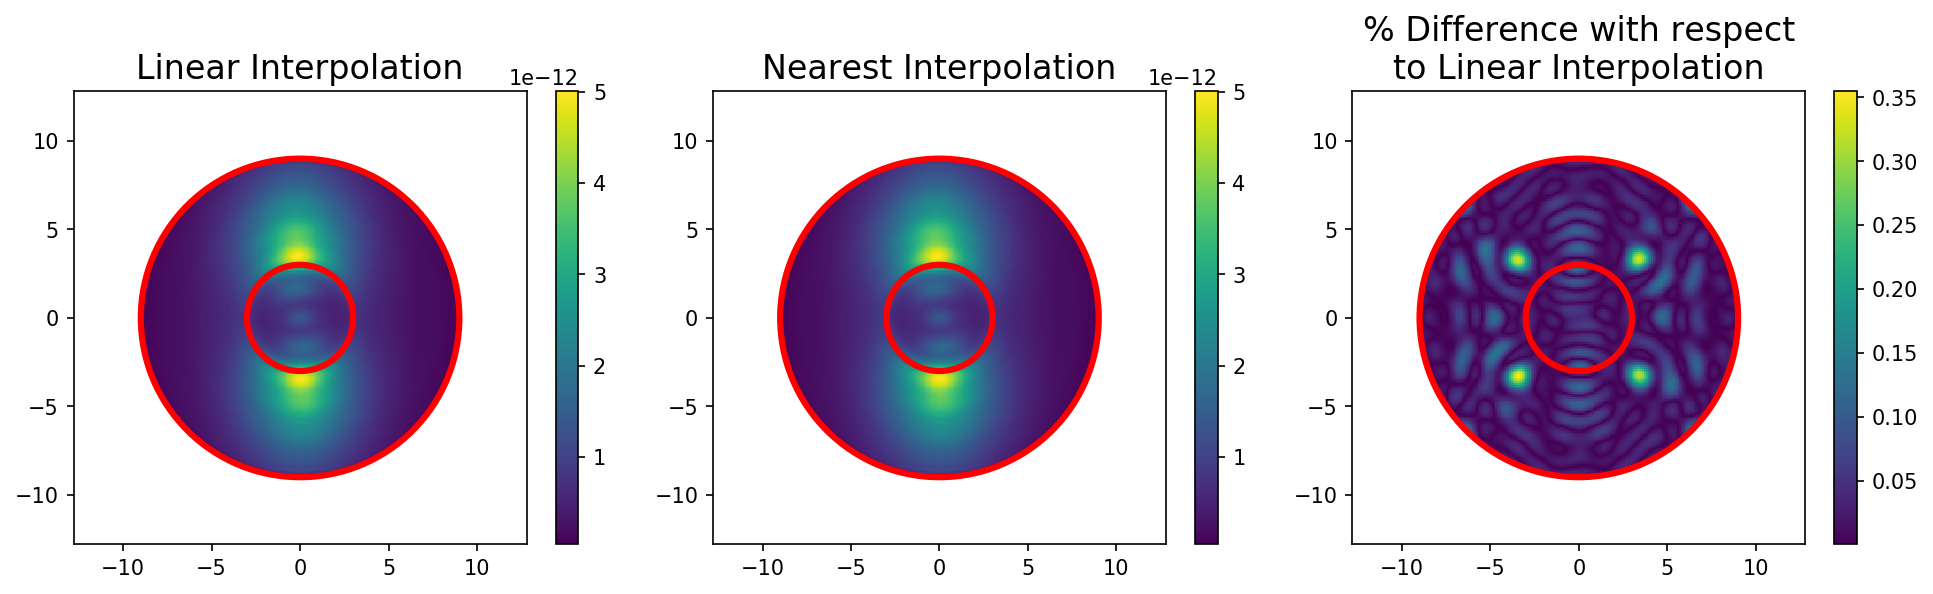

In [16]:
inc = 81.29
method1 = 'linear'
psftype1 = 'propDMs'

sim1_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype1+'_'+method1+'.fits'
sim1 = fits.getdata(sim1_fname)
sim1 = mask_im(sim1,prop_pxscl_mas,nprop)

method2 = 'nearest'
psftype2 = 'propDMs'

sim2_fname = 'simulation_results/sim_10pc3.529mas{:.2f}inc_'.format(inc)+psftype2+'_'+method2+'.fits'
sim2 = fits.getdata(sim2_fname)
sim2 = mask_im(sim2,prop_pxscl_mas,nprop)

diff = sim1-sim2 # get the difference between the simulation data
perdiff = np.abs(diff/sim1*100) # this is the percent difference array with respect to the 1st simulation data
get_avg_masked(perdiff) # this will display the average and maximum of the percent difference array

figwidth = 16
figheight = 4
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figwidth,figheight), dpi = 150 )
cbar_size = 1
fontsz = 16

im = ax[0].imshow(sim1, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[0], shrink=cbar_size) 

im = ax[1].imshow(sim2, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Nearest Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[1], shrink=cbar_size)

im = ax[2].imshow(perdiff, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[2].add_patch(circ_in)
ax[2].add_patch(circ_out)
ax[2].set_title('% Difference with respect\nto Linear Interpolation',fontsize=fontsz)
fig.colorbar(im, ax=ax[2], shrink=cbar_size) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)